In [2]:
# 5420 - HW3
# Haoran Yang

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import RareLabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# /Users/yanghaoran/Desktop/5420 anomly detection/HW3
os.chdir("/Users/yanghaoran/Desktop/5420 anomly detection/HW3")

In [5]:
df = pd.read_csv("XYZloan_default_selected_vars.csv")

print(df.head())


   Unnamed: 0.1  Unnamed: 0  id  loan_default  AP001  AP002  AP003  AP004  \
0             0           1   1             1     31      2      1     12   
1             1           2   2             0     27      1      1     12   
2             2           3   3             0     33      1      4     12   
3             3           4   4             0     34      2      4     12   
4             4           5   5             0     47      2      1     12   

            AP005    AP006  ...  CD162  CD164  CD166  CD167   CD169   CD170  \
0  2017/7/6 10:21      ios  ...   13.0   13.0    0.0    0.0  1449.0  1449.0   
1  2017/4/6 12:51       h5  ...  -99.0  -99.0  -99.0  -99.0   -99.0   -99.0   
2  2017/7/1 14:11       h5  ...    3.0    2.0   33.0    0.0    33.0     0.0   
3  2017/7/7 10:10  android  ...    0.0    0.0    0.0    0.0     0.0     0.0   
4  2017/7/6 14:37       h5  ...  -99.0  -99.0  -99.0  -99.0   -99.0   -99.0   

    CD172   CD173  MB005    MB007  
0  2249.0  2249.0    7.0  

# EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer


In [7]:

sns.set(style="whitegrid")


In [8]:
# Replace -99 with NaN
df.replace(-99, np.nan, inplace=True)


In [9]:
# Define the variables for EDA
selected_vars = [
    'AP001', 'AP003', 'AP008',
    'CR009', 'CR015', 'CR019',
    'PA022', 'PA023', 'PA029',
    'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014'
]

# Include the target variable
selected_vars.append('loan_default')

# Check data types
print("\nData Types of Selected Variables:")
print(df[selected_vars].dtypes)

# Identify numerical and categorical variables
numerical_vars = df[selected_vars].select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_vars.remove('loan_default')  # Exclude target variable
categorical_vars = [var for var in selected_vars if var not in numerical_vars and var != 'loan_default']

print("\nNumerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)



Data Types of Selected Variables:
AP001             int64
AP003             int64
AP008             int64
CR009             int64
CR015             int64
CR019             int64
PA022           float64
PA023           float64
PA029           float64
TD001             int64
TD005             int64
TD006             int64
TD009             int64
TD010             int64
TD014             int64
loan_default      int64
dtype: object

Numerical Variables:
['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

Categorical Variables:
[]


In [10]:
# Display summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:\n")
print(df[selected_vars].describe())


Summary Statistics for Numerical Variables:

              AP001         AP003         AP008         CR009         CR015  \
count  80000.000000  80000.000000  80000.000000  8.000000e+04  80000.000000   
mean      31.706913      2.014925      3.117200  3.518711e+04      4.924750   
std        7.075070      1.196806      1.306335  6.359684e+04      1.094305   
min       20.000000      1.000000      1.000000  0.000000e+00      2.000000   
25%       27.000000      1.000000      2.000000  4.700000e+03      5.000000   
50%       30.000000      1.000000      3.000000  1.728500e+04      5.000000   
75%       35.000000      3.000000      4.000000  4.075000e+04      6.000000   
max       56.000000      6.000000      5.000000  1.420300e+06      6.000000   

              CR019         PA022         PA023         PA029         TD001  \
count  80000.000000  78085.000000  78085.000000  78085.000000  80000.000000   
mean       6.199038     21.622821     17.065019    -41.295579      1.986962   
std   

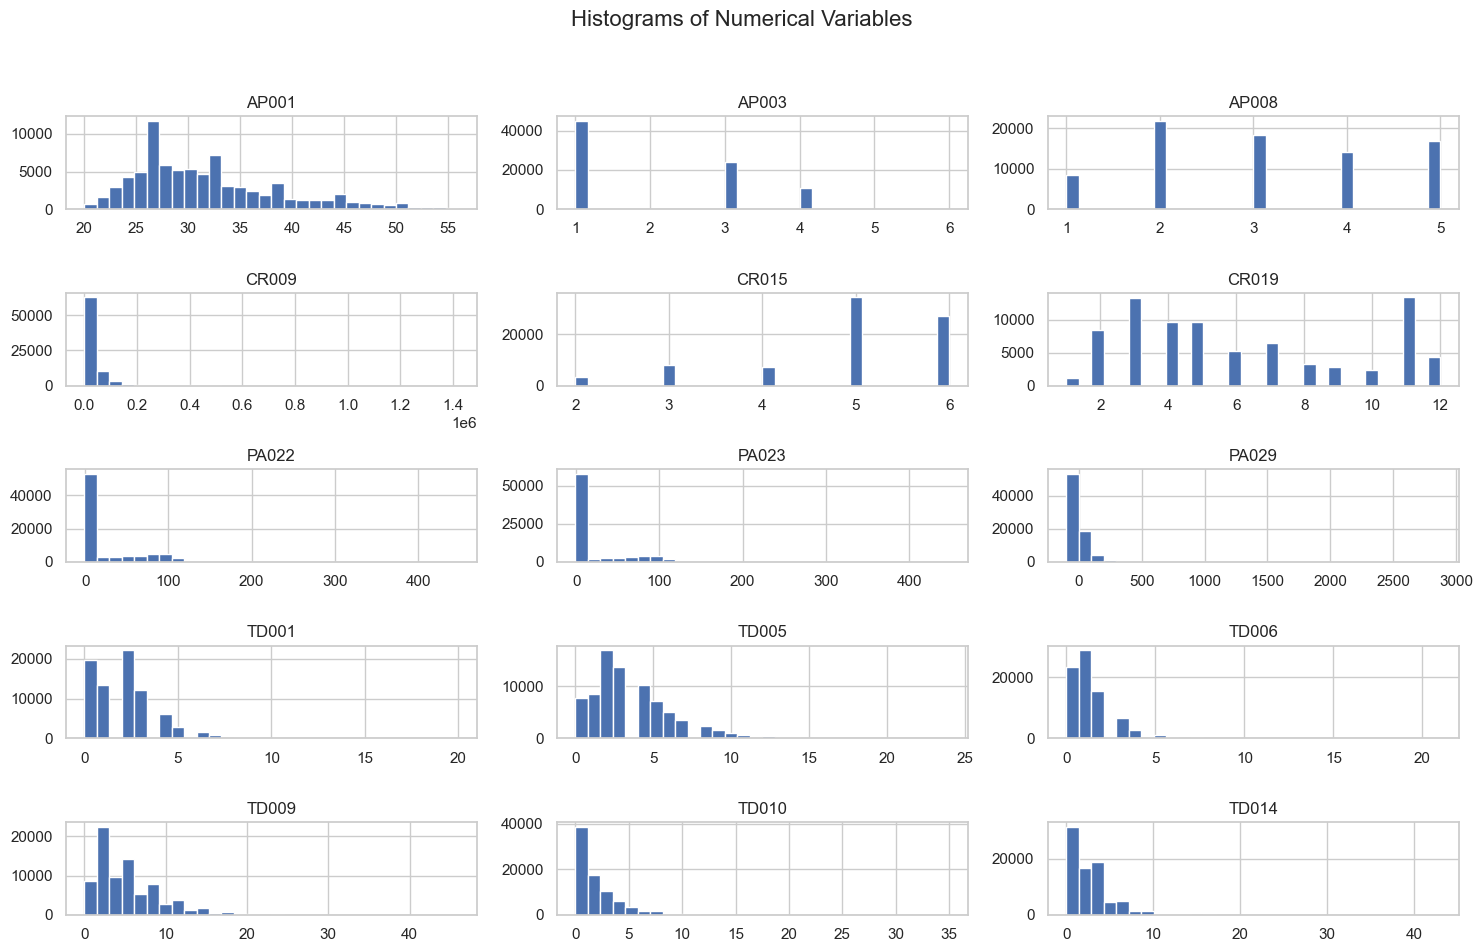

In [11]:
# Plot histograms for all numerical variables
df[selected_vars[:-1]].hist(bins=30, figsize=(15, 10), layout=(5, 3))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


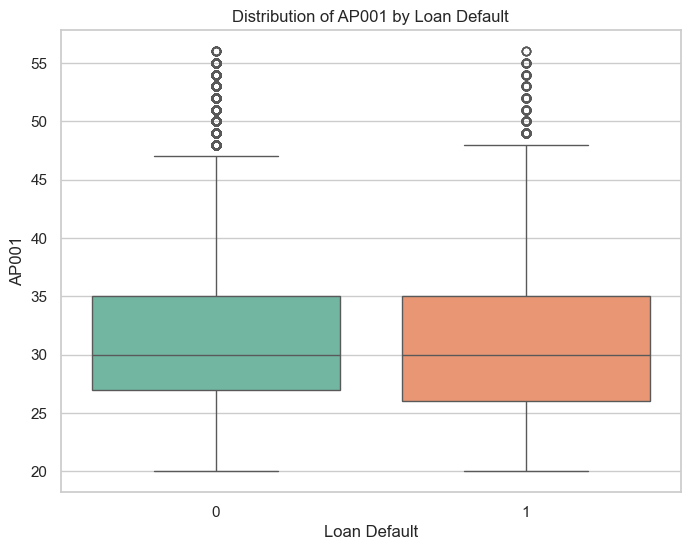

**Business Insight for AP001:** As AP001 increases, the likelihood of loan default decreases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


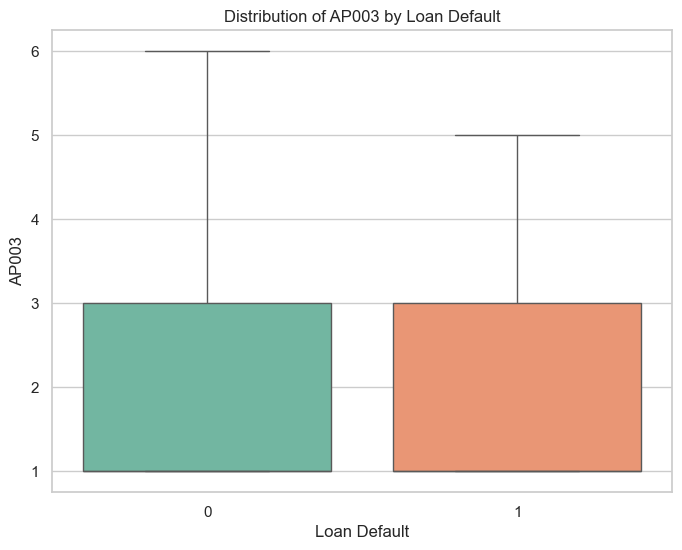

**Business Insight for AP003:** As AP003 increases, the likelihood of loan default decreases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


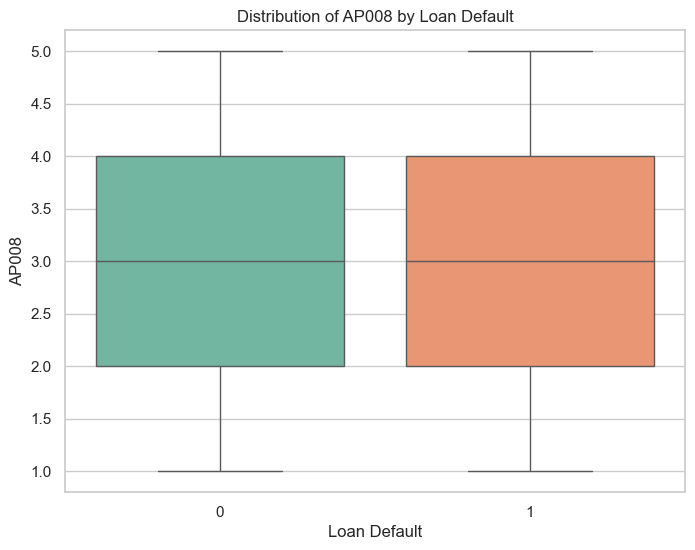

**Business Insight for AP008:** As AP008 increases, the likelihood of loan default increases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


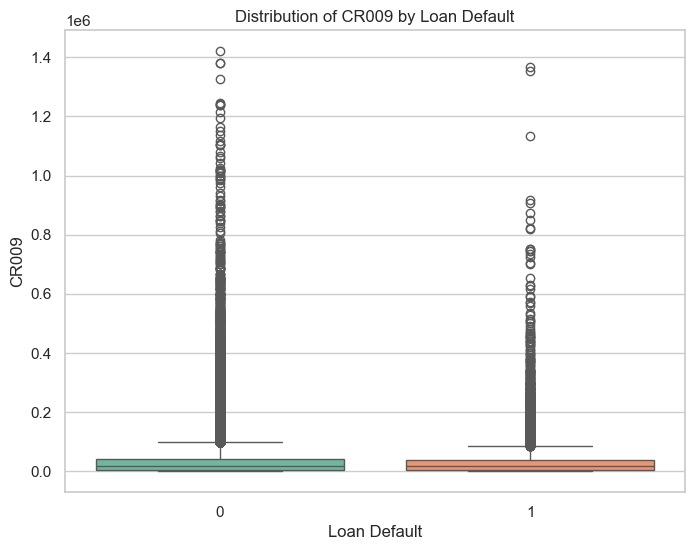

**Business Insight for CR009:** As CR009 increases, the likelihood of loan default decreases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


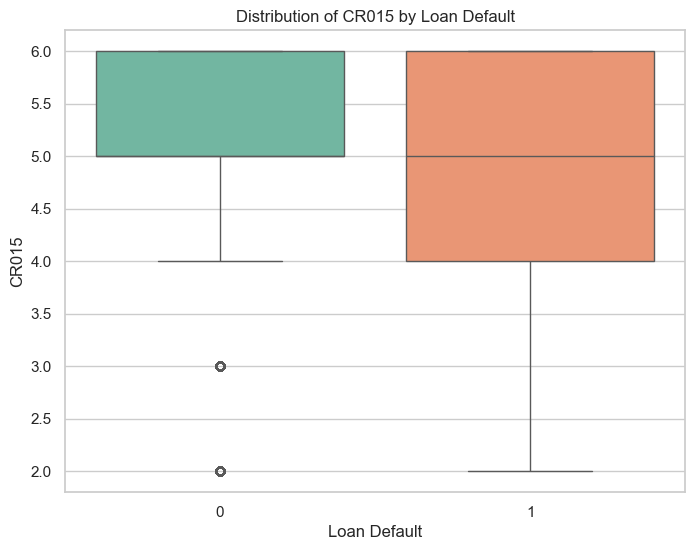

**Business Insight for CR015:** As CR015 increases, the likelihood of loan default decreases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


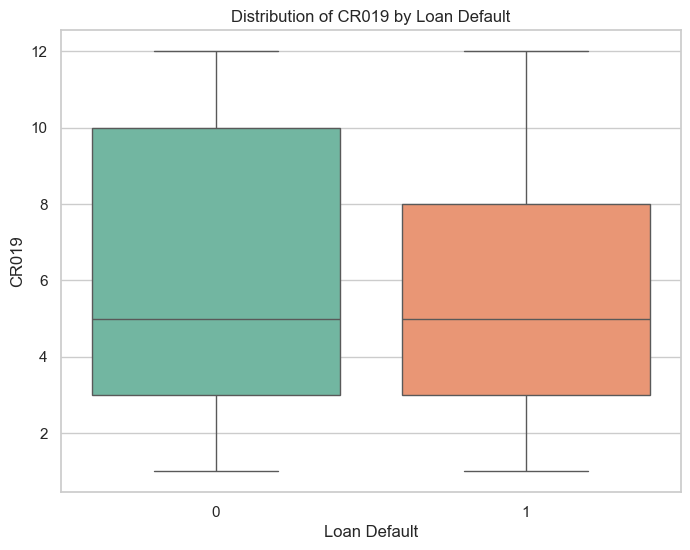

/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


**Business Insight for CR019:** As CR019 increases, the likelihood of loan default decreases.



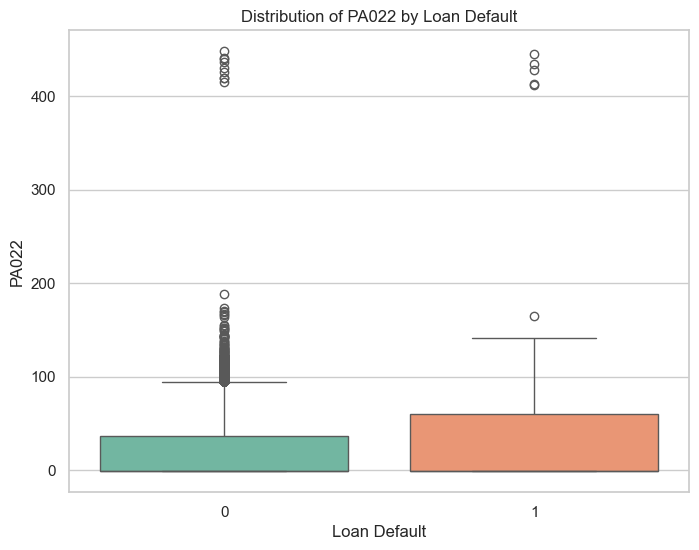

/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


**Business Insight for PA022:** As PA022 increases, the likelihood of loan default increases.



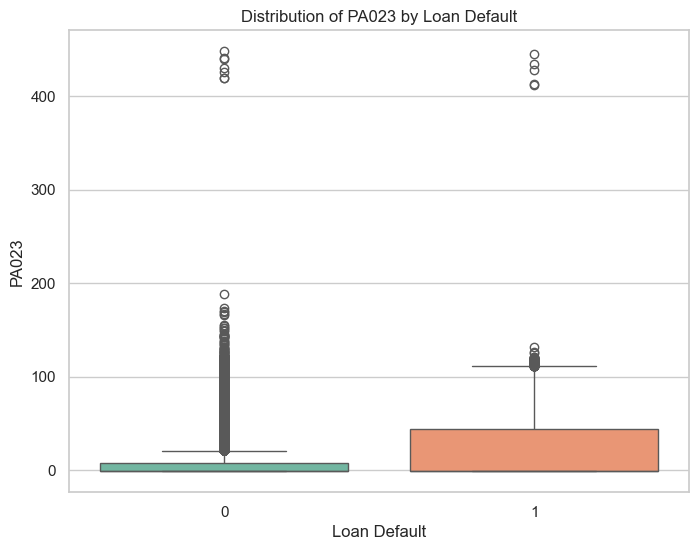

**Business Insight for PA023:** As PA023 increases, the likelihood of loan default increases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


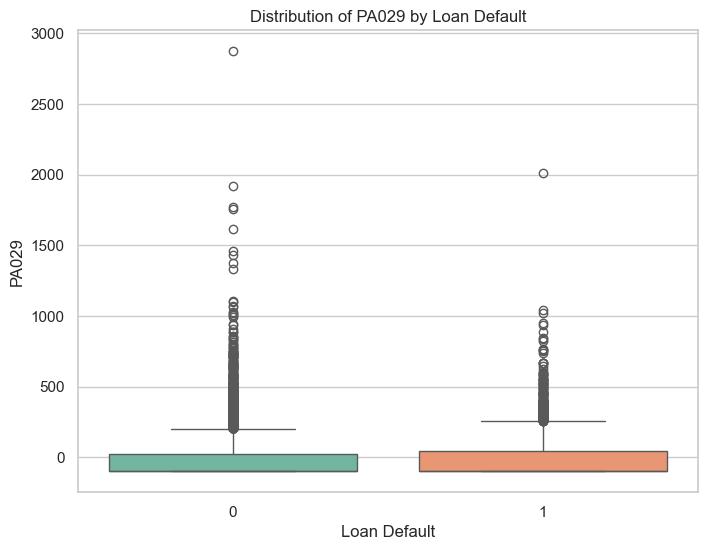

**Business Insight for PA029:** As PA029 increases, the likelihood of loan default increases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


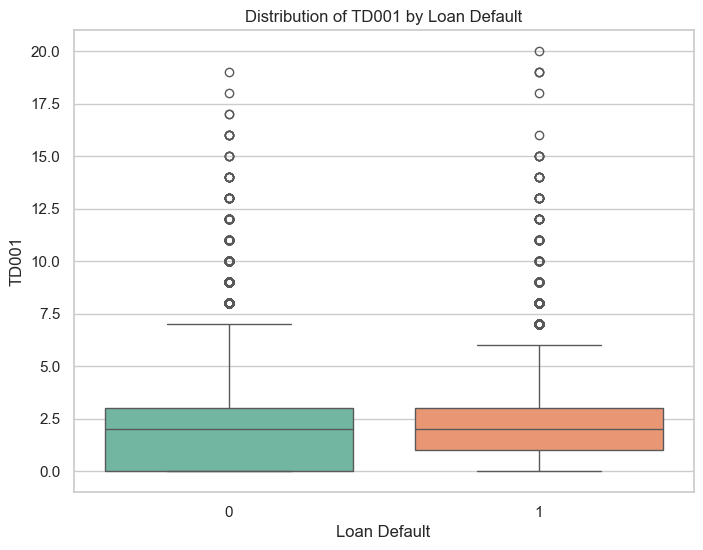

**Business Insight for TD001:** As TD001 increases, the likelihood of loan default increases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


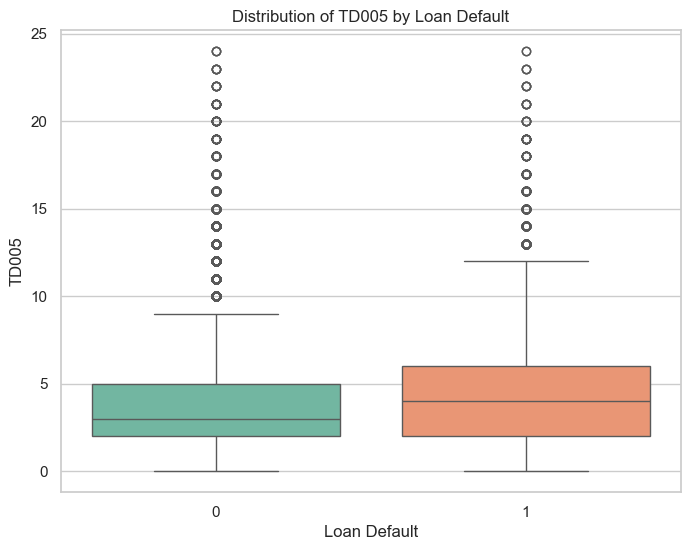

/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


**Business Insight for TD005:** As TD005 increases, the likelihood of loan default increases.



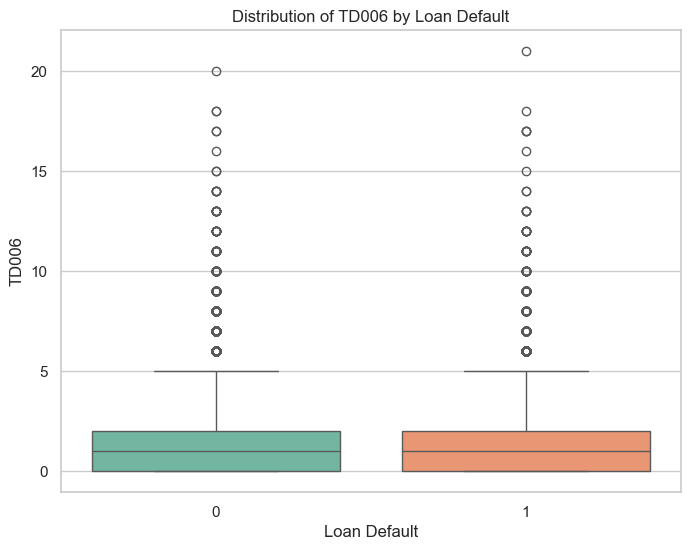

/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


**Business Insight for TD006:** As TD006 increases, the likelihood of loan default increases.



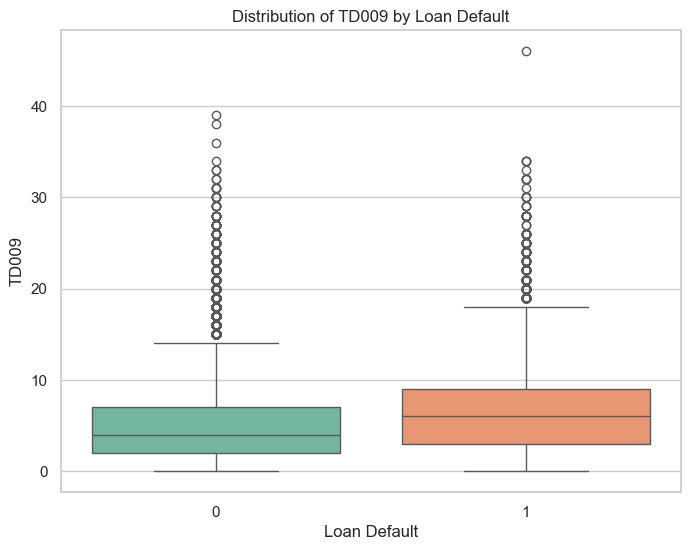

/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


**Business Insight for TD009:** As TD009 increases, the likelihood of loan default increases.



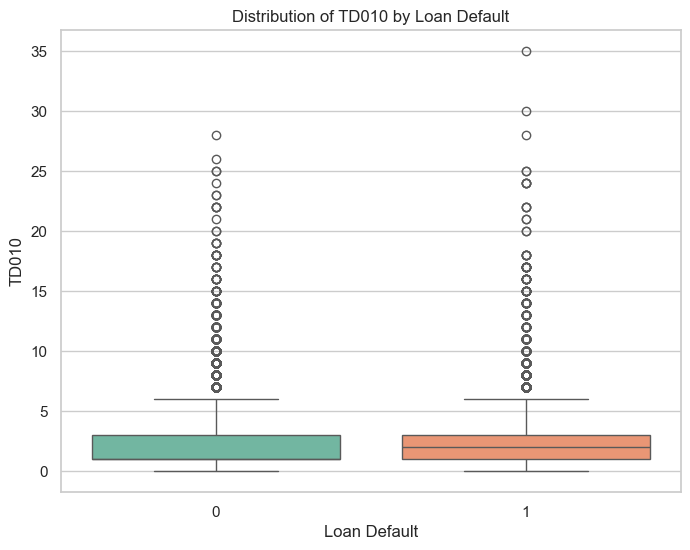

**Business Insight for TD010:** As TD010 increases, the likelihood of loan default increases.



/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_75817/299782097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")


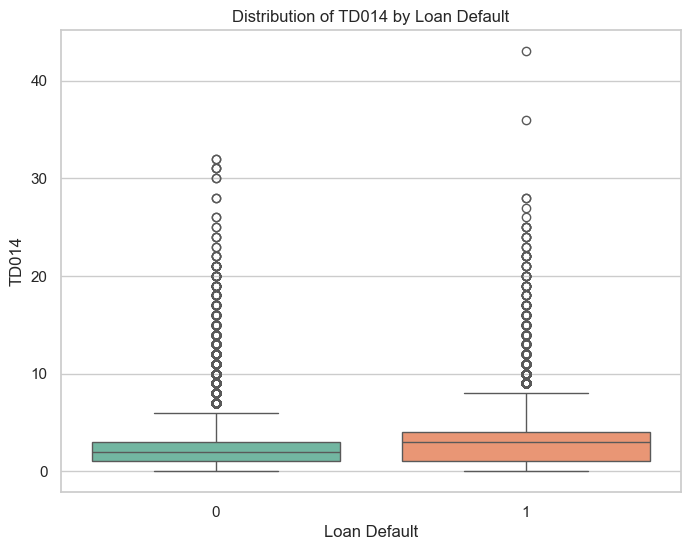

**Business Insight for TD014:** As TD014 increases, the likelihood of loan default increases.



In [12]:
# Iterate through each numerical variable and plot boxplots
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_default', y=var, data=df, palette="Set2")
    plt.title(f'Distribution of {var} by Loan Default')
    plt.xlabel('Loan Default')
    plt.ylabel(var)
    plt.show()
    
    # Calculate mean values for insight
    group_means = df.groupby('loan_default')[var].mean()
    if group_means[1] > group_means[0]:
        insight = f"As {var} increases, the likelihood of loan default increases."
    else:
        insight = f"As {var} increases, the likelihood of loan default decreases."
    print(f"**Business Insight for {var}:** {insight}\n")


#  Feature Engineering

In [13]:
# 1. Data Splitting
# ------------------
# Separate features and target
X = df[selected_vars[:-1]]  # All features except 'loan_default'
y = df['loan_default']


In [17]:
# Split the data into training and testing sets (70% train, 30% test)
# Using stratify to maintain the distribution of the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (56000, 15)
Testing set size: (24000, 15)


In [19]:
continuous_vars_to_bin = ['CR009', 'PA029']

['CR009', 'PA029']

In [20]:
for var in continuous_vars_to_bin:
    # Create a new binned variable in the training set
    X_train[f'{var}_binned'], bins = pd.qcut(X_train[var], q=5, duplicates='drop', retbins=True)
    
    # Apply the same bins to the test set
    X_test[f'{var}_binned'] = pd.cut(X_test[var], bins=bins, include_lowest=True)
    
    # Drop the original continuous variable
    X_train.drop(columns=[var], inplace=True)
    X_test.drop(columns=[var], inplace=True)


In [31]:
# Update lists of variables after binning
binned_vars = ['CR009_binned', 'PA029_binned']
numerical_vars = [var for var in numerical_vars if var not in continuous_vars_to_bin]
categorical_vars = list(set(categorical_vars + binned_vars))

print("\nNumerical Variables after Binning:")
print(numerical_vars)

print("\nCategorical Variables after Binning:")
print(categorical_vars)


Numerical Variables after Binning:
['AP001', 'AP003', 'AP008', 'CR015', 'CR019', 'PA022', 'PA023', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

Categorical Variables after Binning:
['PA029_binned', 'CR009_binned']


In [33]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer for numerical variables using median strategy
numerical_imputer = SimpleImputer(strategy='median')

# Fit on training data and transform both training and testing data
X_train[numerical_vars] = numerical_imputer.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = numerical_imputer.transform(X_test[numerical_vars])

# Verify that numerical variables have no missing values
print("\nMissing values in X_train numerical_vars after re-imputation:")
print(X_train[numerical_vars].isnull().sum())

print("\nMissing values in X_test numerical_vars after re-imputation:")
print(X_test[numerical_vars].isnull().sum())



Missing values in X_train numerical_vars after re-imputation:
AP001    0
AP003    0
AP008    0
CR015    0
CR019    0
PA022    0
PA023    0
TD001    0
TD005    0
TD006    0
TD009    0
TD010    0
TD014    0
dtype: int64

Missing values in X_test numerical_vars after re-imputation:
AP001    0
AP003    0
AP008    0
CR015    0
CR019    0
PA022    0
PA023    0
TD001    0
TD005    0
TD006    0
TD009    0
TD010    0
TD014    0
dtype: int64


In [38]:
import feature_engine
print(f"feature_engine version after upgrade: {feature_engine.__version__}")


feature_engine version after upgrade: 1.8.1


In [42]:
from feature_engine.encoding import WoEEncoder

# Initialize WoEEncoder with the correct parameters
woe_encoder = WoEEncoder(
    variables=categorical_vars,  # Specify the categorical variables to encode
    ignore_format=True  # This allows the encoder to work with numeric categorical variables
)

# Fit the encoder on the training data and transform both training and testing data
X_train_encoded = woe_encoder.fit_transform(X_train, y_train)
X_test_encoded = woe_encoder.transform(X_test)

print("\nWoE Encoding Completed.")


WoE Encoding Completed.
